In [2]:
import pandas as pd 
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

## Read data set

In [3]:
df = pd.read_csv('data_cleaned.csv')
display(df.shape)
df.head(10)

(334205, 18)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,VegetableAndFruits,BMI_new
0,0,1.0,0.0,0.0,20.0,10.0,0.0,0,11.0,1.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,14.515556
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,11.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,28.323232
2,0,0.0,0.0,0.0,0.0,10.0,0.0,0,9.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,33.290677
3,1,0.0,0.0,1.0,30.0,0.0,1.0,1,12.0,7.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,28.839506
4,0,1.0,0.0,0.0,0.0,0.0,1.0,1,13.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,24.245498
5,0,0.0,0.0,0.0,30.0,0.0,1.0,1,9.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,46.050942
6,1,1.0,0.0,0.0,0.0,0.0,0.0,1,9.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,22.808163
7,0,1.0,0.0,0.0,25.0,5.0,1.0,0,10.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,39.985308
8,0,1.0,0.0,0.0,0.0,25.0,0.0,0,10.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,27.313787
9,0,0.0,0.0,0.0,0.0,0.0,1.0,0,11.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,23.742188


## Some data cleaning

In [4]:
# assign none/dont know/ refused value to 0 for PhysicalHealth and MentalHealth

df.loc[(df.PhysicalHealth == 88.0),'PhysicalHealth'] = 0
df.loc[(df.PhysicalHealth == 77.0),'PhysicalHealth'] = 0
df.loc[(df.PhysicalHealth == 99.0),'PhysicalHealth'] = 0
df.loc[(df.MentalHealth == 88.0),'MentalHealth'] = 0
df.loc[(df.MentalHealth == 77.0),'MentalHealth'] = 0
df.loc[(df.MentalHealth == 99.0),'MentalHealth'] = 0
df.shape

(334205, 18)

In [6]:
# drop diabetes during  female pregnancy 

df = df[df['Diabetic'] != 2]
display(df.shape)

(334205, 18)

In [7]:
# missing value checking
df.isna().any()

HeartDisease          False
Smoking               False
AlcoholDrinking       False
Stroke                False
PhysicalHealth        False
MentalHealth          False
DiffWalking           False
Sex                   False
AgeCategory           False
Race                  False
Diabetic              False
PhysicalActivity      False
GenHealth             False
Asthma                False
KidneyDisease         False
SkinCancer            False
VegetableAndFruits    False
BMI_new               False
dtype: bool

## Data Summary

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334205 entries, 0 to 334204
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   HeartDisease        334205 non-null  int64  
 1   Smoking             334205 non-null  float64
 2   AlcoholDrinking     334205 non-null  float64
 3   Stroke              334205 non-null  float64
 4   PhysicalHealth      334205 non-null  float64
 5   MentalHealth        334205 non-null  float64
 6   DiffWalking         334205 non-null  float64
 7   Sex                 334205 non-null  int64  
 8   AgeCategory         334205 non-null  float64
 9   Race                334205 non-null  float64
 10  Diabetic            334205 non-null  float64
 11  PhysicalActivity    334205 non-null  float64
 12  GenHealth           334205 non-null  float64
 13  Asthma              334205 non-null  float64
 14  KidneyDisease       334205 non-null  float64
 15  SkinCancer          334205 non-nul

In [9]:
df.nunique()

HeartDisease             2
Smoking                  2
AlcoholDrinking          2
Stroke                   2
PhysicalHealth          31
MentalHealth            31
DiffWalking              2
Sex                      2
AgeCategory             14
Race                     9
Diabetic                 2
PhysicalActivity         2
GenHealth                5
Asthma                   2
KidneyDisease            2
SkinCancer               2
VegetableAndFruits       2
BMI_new               6988
dtype: int64

In [10]:
df.describe()[1:][['BMI_new','PhysicalHealth','MentalHealth']]

,BMI_new,PhysicalHealth,MentalHealth
mean,28.570247,3.649093,4.036364
std,6.528536,8.165286,8.025707
min,11.950017,0.000000,0.000000
25%,24.107143,0.000000,0.000000
50%,27.399184,0.000000,0.000000
75%,31.807159,2.000000,4.000000
max,99.371171,30.000000,30.000000


## Visualization Of Categorical Features

In [11]:
df.value_counts('Sex')

Sex
0    172796
1    161409
dtype: int64

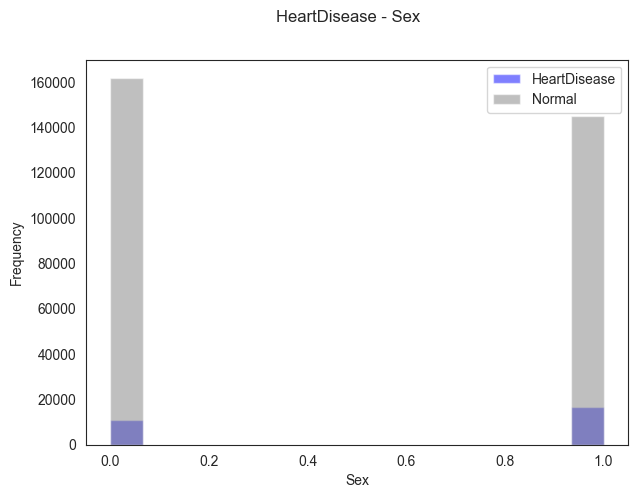

In [53]:
fig, ax = plt.subplots(figsize = (7,5))

ax.hist(df[df["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("HeartDisease - Sex")

ax.legend();

* 1 refers to men and 0 refers to women on the x-axis.

In [13]:
df.value_counts('Smoking') 

Smoking
0.0    198568
1.0    135637
dtype: int64

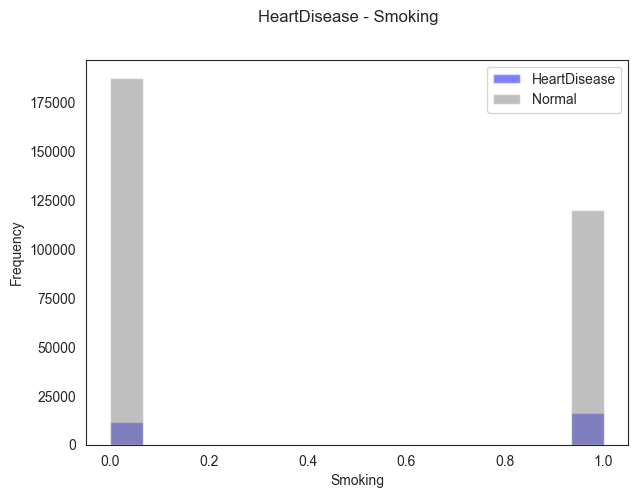

In [54]:
fig, ax = plt.subplots(figsize = (7,5))

ax.hist(df[df["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("HeartDisease - Smoking")

ax.legend();

* Yes:1, No:0
* People who smoke are more likely to have heart disease than people who don't smoke

In [15]:
df.value_counts('Race')

Race
1.0    252816
8.0     27491
2.0     23121
4.0      8473
7.0      7135
9.0      5661
3.0      5361
6.0      2656
5.0      1491
dtype: int64

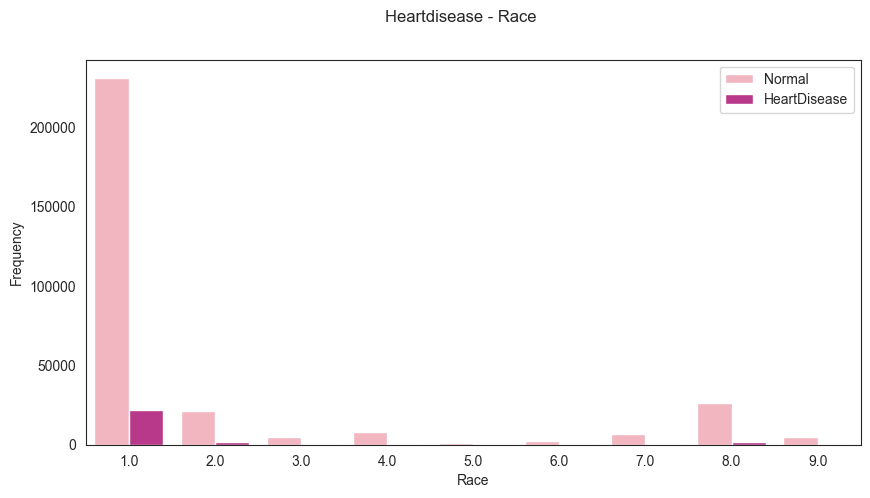

In [65]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(data = df, x= df['Race'], hue = 'HeartDisease', palette = "RdPu")
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.legend(['Normal','HeartDisease'])
fig.suptitle("Heartdisease - Race")
plt.show()


* 1: White only, non-Hispanic
* 2: Black only, non-Hispanic
* 3: American Indian or Alaskan Native only, Non-Hispanic
* 4: Asian only, non-Hispanic
* 5: Native Hawaiian or other Pacific Islander only, Non-Hispanic
* 6: Other race only, non-Hispanic
* 7: Multiracial, non-Hispanic
* 8: Hispanic
* 9: Don’t know/Not sure/ Refused

In [17]:
df.value_counts('AgeCategory')

AgeCategory
10.0    36031
9.0     34779
11.0    33691
8.0     29862
7.0     26527
13.0    25062
12.0    22786
5.0     22623
6.0     22059
4.0     21522
1.0     20003
3.0     19292
2.0     16401
14.0     3567
dtype: int64

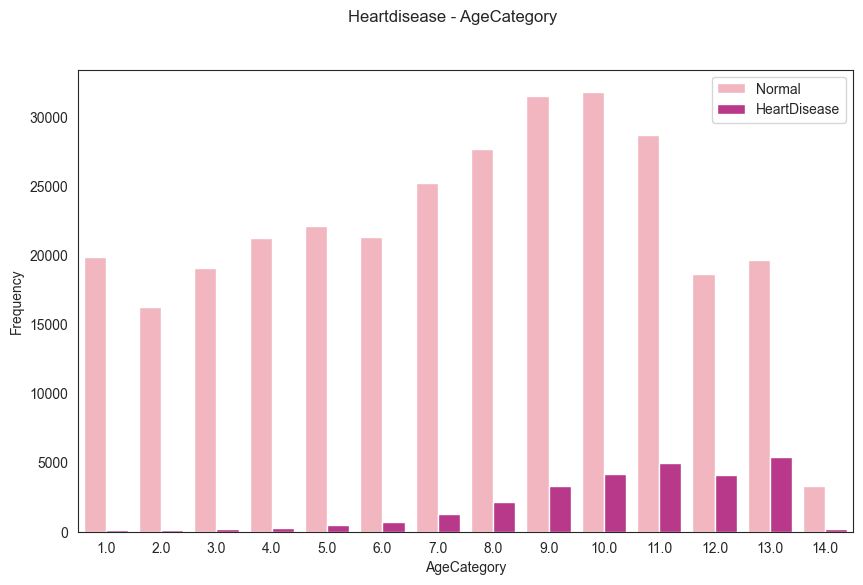

In [68]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(data = df, x = df['AgeCategory'], hue = 'HeartDisease', palette = "RdPu")

plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
fig.suptitle("Heartdisease - AgeCategory")
plt.show()

* Age category:
* 1: 18-24; 
* 2: 25-29; 
* 3: 30-34; 
* 4: 35-39; 
* 5: 40-44; 
* 6: 45-49; 
* 7: 50-54; 
* 8: 55-59; 
* 9: 60-64; 
* 10: 65-69; 
* 11: 70-74; 
* 12: 75-79; 
* 13: 80+; 
* 14 not found

In [19]:
df.value_counts('KidneyDisease')

KidneyDisease
0.0    321065
1.0     13140
dtype: int64

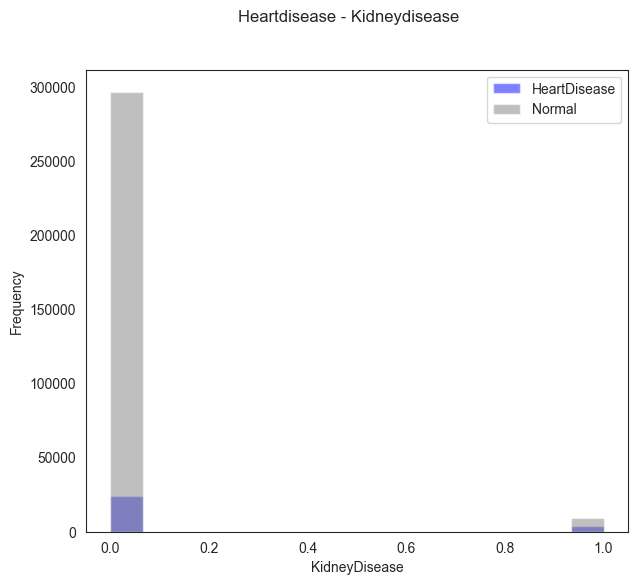

In [70]:
fig, ax = plt.subplots(figsize = (7,6))

ax.hist(df[df["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Heartdisease - Kidneydisease")

ax.legend();


In [21]:
df.value_counts('SkinCancer')

SkinCancer
0.0    301605
1.0     32600
dtype: int64

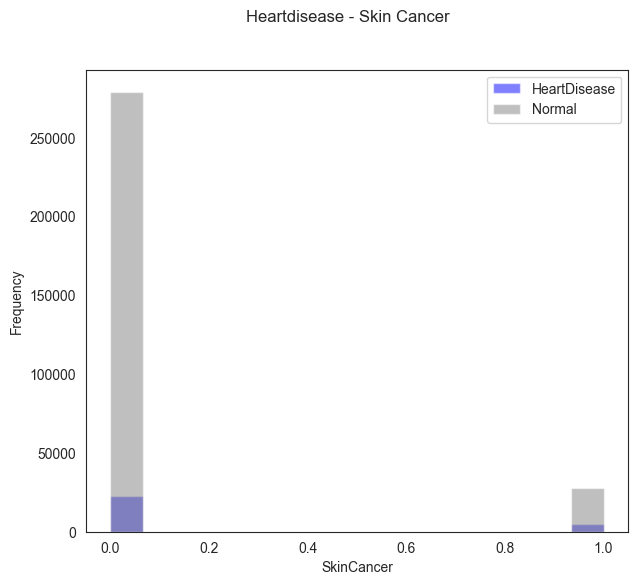

In [71]:
fig, ax = plt.subplots(figsize = (7,6))

ax.hist(df[df["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

fig.suptitle("Heartdisease - Skin Cancer")

ax.legend();

In [23]:
df.value_counts('Stroke')

Stroke
0.0    321413
1.0     12792
dtype: int64

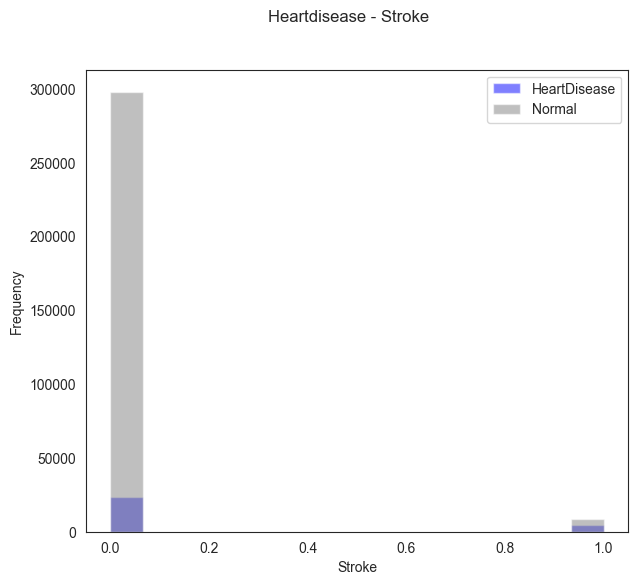

In [72]:
fig, ax = plt.subplots(figsize = (7,6))

ax.hist(df[df["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Heartdisease - Stroke")

ax.legend();

In [25]:
df.value_counts('Diabetic')

Diabetic
0.0    290193
1.0     44012
dtype: int64

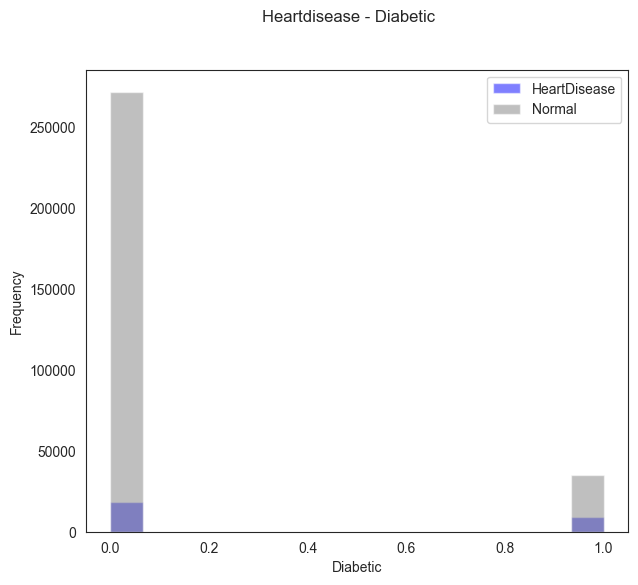

In [73]:
fig, ax = plt.subplots(figsize = (7,6))

ax.hist(df[df["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="blue", label="HeartDisease")

ax.hist(df[df["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Heartdisease - Diabetic")

ax.legend();

* 1: yes
* 0: no

In [27]:
df.value_counts('VegetableAndFruits')

VegetableAndFruits
1.0    272699
0.0     61506
dtype: int64

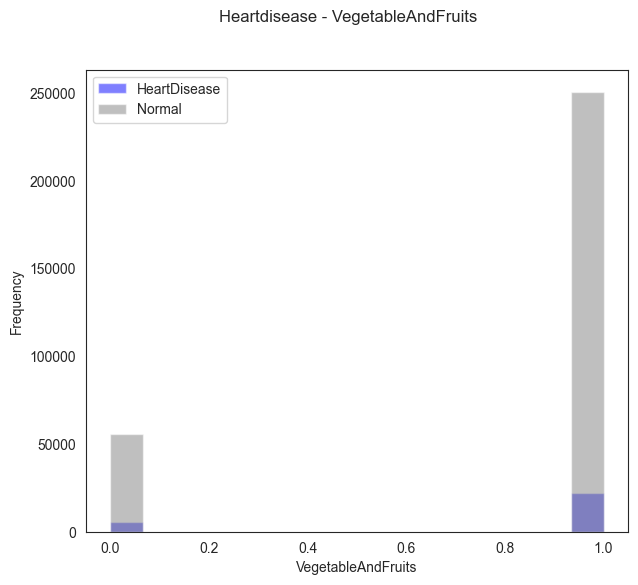

In [74]:
fig, ax = plt.subplots(figsize = (7,6))

ax.hist(df[df["HeartDisease"]==1]["VegetableAndFruits"], bins=15, alpha=0.5, color="blue", label="HeartDisease")

ax.hist(df[df["HeartDisease"]==0]["VegetableAndFruits"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("VegetableAndFruits")
ax.set_ylabel("Frequency")

fig.suptitle("Heartdisease - VegetableAndFruits")

ax.legend();

In [29]:
df.value_counts('AlcoholDrinking')

AlcoholDrinking
0.0    313665
1.0     20540
dtype: int64

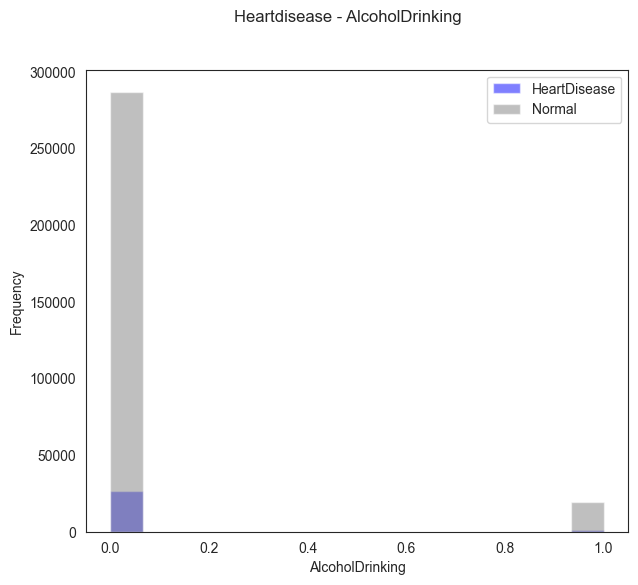

In [75]:
fig, ax = plt.subplots(figsize = (7,6))

ax.hist(df[df["HeartDisease"]==1]["AlcoholDrinking"], bins=15, alpha=0.5, color="blue", label="HeartDisease")

ax.hist(df[df["HeartDisease"]==0]["AlcoholDrinking"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Frequency")

fig.suptitle("Heartdisease - AlcoholDrinking")

ax.legend();

In [31]:
df.value_counts('DiffWalking')

DiffWalking
0.0    283030
1.0     51175
dtype: int64

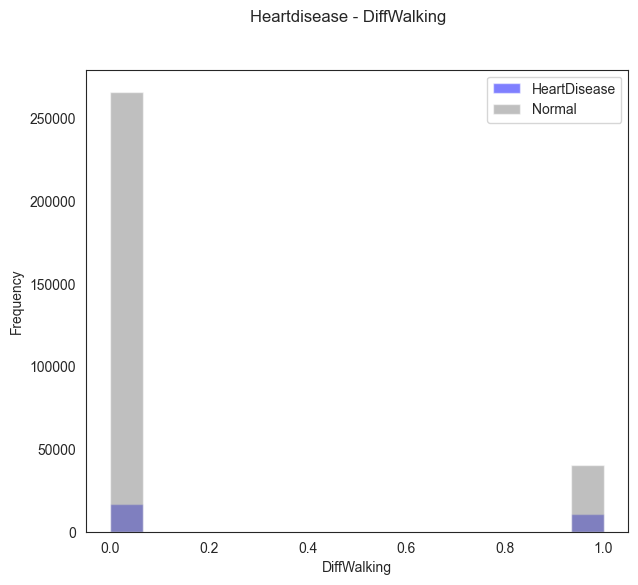

In [78]:
fig, ax = plt.subplots(figsize = (7,6))

ax.hist(df[df["HeartDisease"]==1]["DiffWalking"], bins=15, alpha=0.5, color="blue", label="HeartDisease")

ax.hist(df[df["HeartDisease"]==0]["DiffWalking"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("DiffWalking")
ax.set_ylabel("Frequency")

fig.suptitle("Heartdisease - DiffWalking")

ax.legend();

In [33]:
df.value_counts('PhysicalActivity')

PhysicalActivity
1.0    257480
0.0     76725
dtype: int64

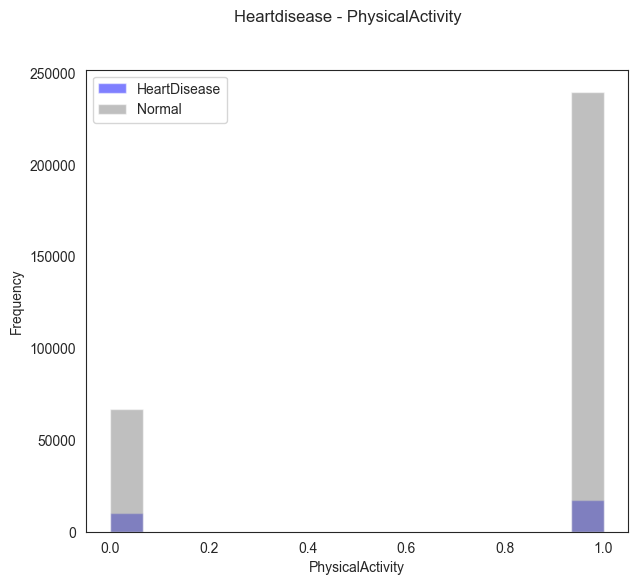

In [79]:
fig, ax = plt.subplots(figsize = (7,6))

ax.hist(df[df["HeartDisease"]==1]["PhysicalActivity"], bins=15, alpha=0.5, color="blue", label="HeartDisease")

ax.hist(df[df["HeartDisease"]==0]["PhysicalActivity"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Frequency")

fig.suptitle("Heartdisease - PhysicalActivity")

ax.legend();

In [35]:
df.value_counts('Asthma')

Asthma
0.0    287229
1.0     46976
dtype: int64

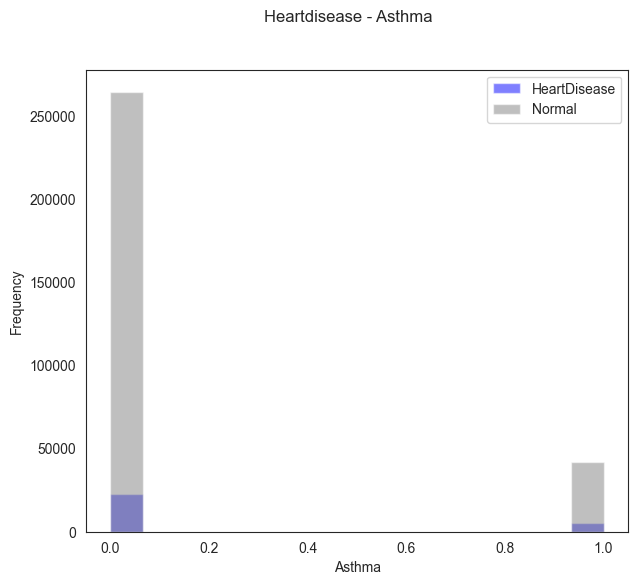

In [80]:
fig, ax = plt.subplots(figsize = (7,6))

ax.hist(df[df["HeartDisease"]==1]["Asthma"], bins=15, alpha=0.5, color="blue", label="HeartDisease")

ax.hist(df[df["HeartDisease"]==0]["Asthma"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("Asthma")
ax.set_ylabel("Frequency")

fig.suptitle("Heartdisease - Asthma")

ax.legend();

In [37]:
df.value_counts('GenHealth')

GenHealth
2.0    117592
3.0    103375
1.0     60230
4.0     40212
5.0     12796
dtype: int64

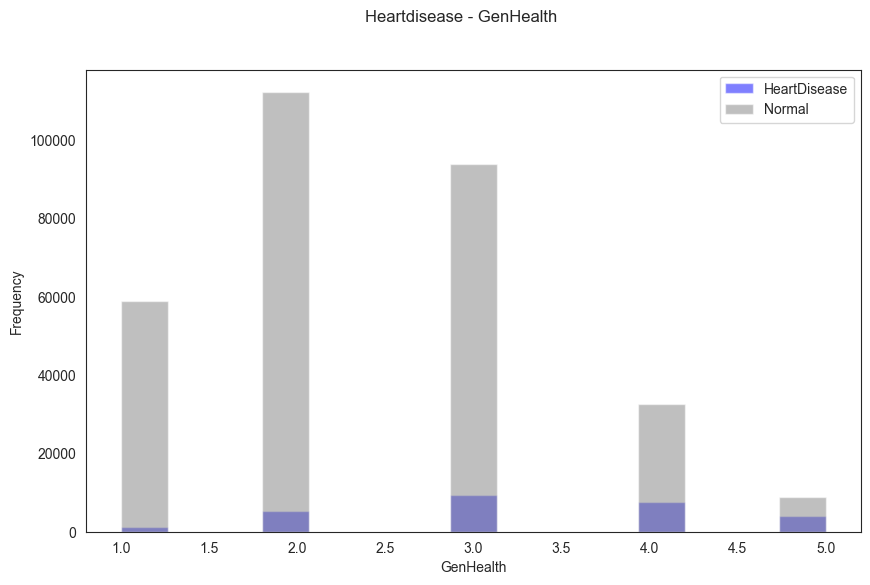

In [81]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]==1]["GenHealth"], bins=15, alpha=0.5, color="blue", label="HeartDisease")

ax.hist(df[df["HeartDisease"]==0]["GenHealth"], bins=15, alpha=0.5, color="grey", label="Normal")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

fig.suptitle("Heartdisease - GenHealth")

ax.legend();

* 1 Excellent
* 2 Very Good 
* 3 Good  
* 4 Fair 
* 5 Poor 

## Visualization Of Numerical Features

<AxesSubplot: >

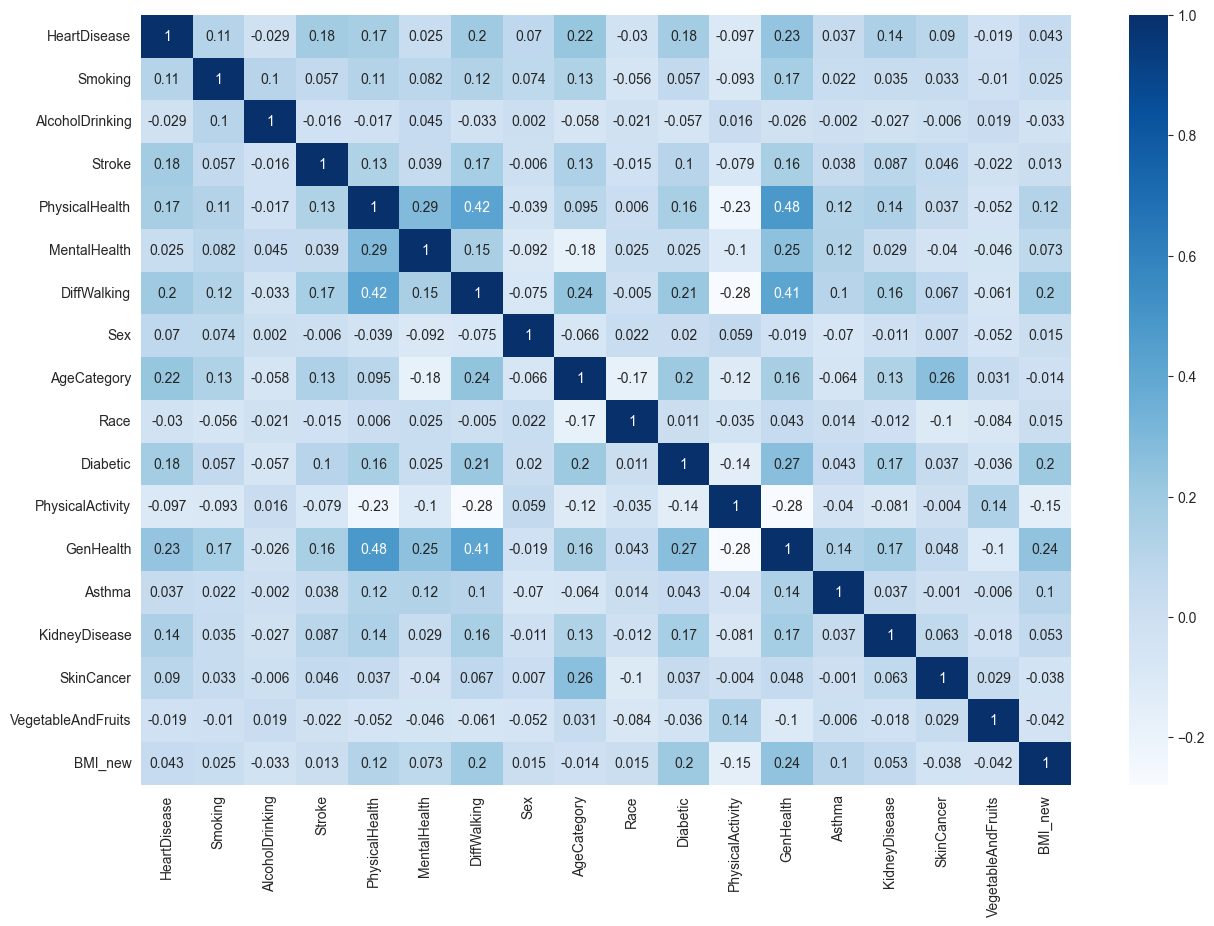

In [82]:
correlation = df.corr().round(3)
plt.figure(figsize = (15,10))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

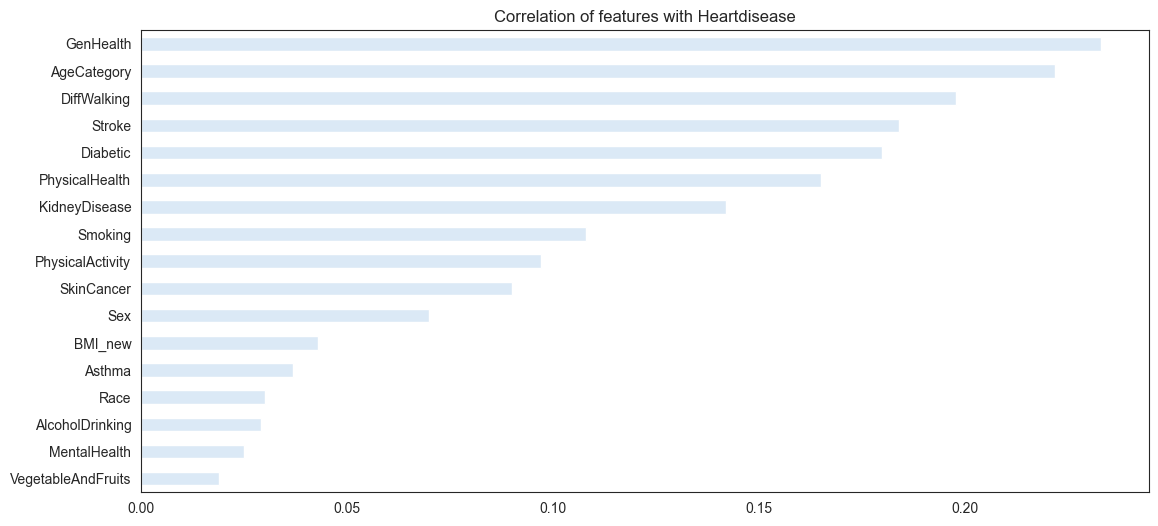

In [83]:
sns.set_style('white')
sns.set_palette('Blues')
plt.figure(figsize = (13,6))
plt.title('Correlation of features with Heartdisease')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

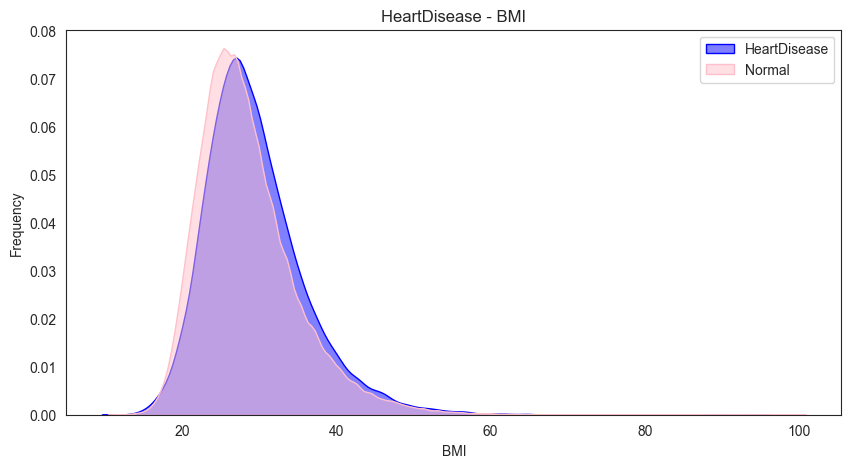

In [86]:
# BMI

fig, ax = plt.subplots(figsize = (10,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI_new"], alpha=0.5,shade = True, color="blue", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI_new"], alpha=0.5,shade = True, color="pink", label="Normal", ax = ax)
plt.title('HeartDisease - BMI', fontsize = 12)
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

#### → People with Heart Disease had a higher BMI than people with no Heart Disease.

In [42]:
# PhysicalHealth

df.value_counts('PhysicalHealth')

PhysicalHealth
0.0     225152
30.0     21809
2.0      17593
1.0      13681
3.0      10121
5.0       9141
10.0      6630
15.0      5739
4.0       5375
7.0       5190
20.0      3587
14.0      3035
6.0       1452
25.0      1404
8.0        964
21.0       697
12.0       623
28.0       490
9.0        231
29.0       194
18.0       189
16.0       169
17.0       123
27.0       120
22.0        95
13.0        95
11.0        94
26.0        70
24.0        67
23.0        46
19.0        29
dtype: int64

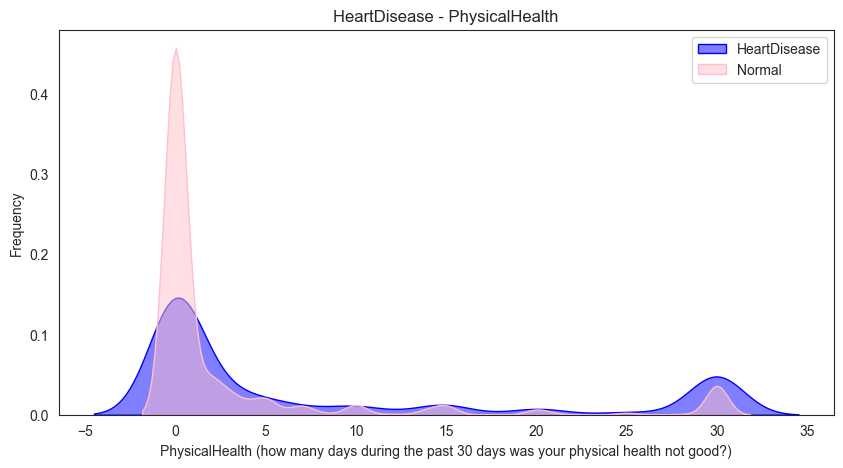

In [87]:
fig, ax = plt.subplots(figsize = (10,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="blue", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="pink", label="Normal", ax = ax)
plt.title('HeartDisease - PhysicalHealth', fontsize = 12) 
ax.set_xlabel("PhysicalHealth (how many days during the past 30 days was your physical health not good?)")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()


* Here, because we assigned None value to 0, 0 means None/Don't know; same for MentalHealth

In [44]:
# MentalHealth

df.value_counts('MentalHealth')

MentalHealth
0.0     209086
30.0     18248
2.0      18191
5.0      15286
3.0      11670
10.0     11573
15.0     10536
1.0      10385
20.0      6221
4.0       5975
7.0       5889
25.0      2320
14.0      2117
6.0       1761
8.0       1252
12.0       851
28.0       621
21.0       380
29.0       290
18.0       231
9.0        199
16.0       177
17.0       156
27.0       152
22.0       128
13.0       119
11.0       113
24.0       100
26.0        82
23.0        76
19.0        20
dtype: int64

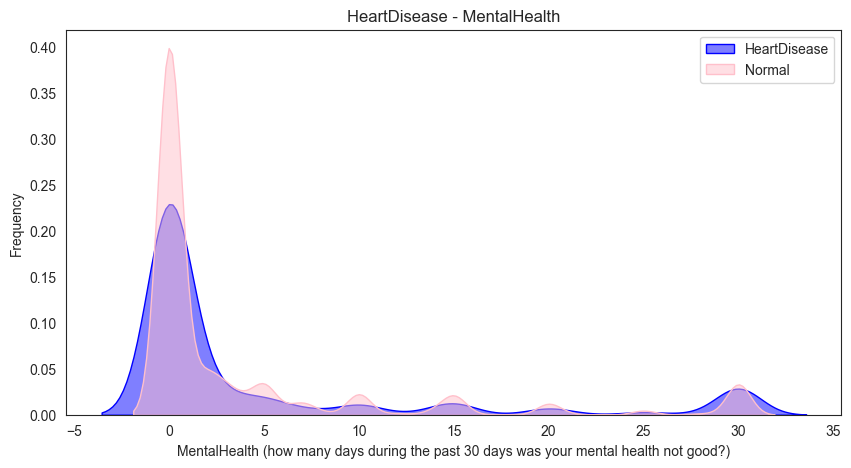

In [88]:
fig, ax = plt.subplots(figsize = (10,5))
sns.kdeplot(df[df["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="blue", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="pink", label="Normal", ax = ax)
plt.title('HeartDisease - MentalHealth', fontsize = 12) 
ax.set_xlabel("MentalHealth (how many days during the past 30 days was your mental health not good?)")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()